In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
data = pd.read_csv('../datasets/train_clust.csv', index_col='datetime')

In [16]:
data.dtypes

season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [24]:
weather_df = data[['season', 'temp', 'atemp', 'humidity','windspeed','registered', 'casual','count']]

In [25]:
weather_df

,season,workingday,holiday,temp,atemp,humidity,windspeed,registered,casual,count
datetime,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,9.84,14.395,81,0.0000,13,3,16
2011-01-01 01:00:00,1,0,0,9.02,13.635,80,0.0000,32,8,40
2011-01-01 02:00:00,1,0,0,9.02,13.635,80,0.0000,27,5,32
2011-01-01 03:00:00,1,0,0,9.84,14.395,75,0.0000,10,3,13
2011-01-01 04:00:00,1,0,0,9.84,14.395,75,0.0000,1,0,1
...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,1,0,15.58,19.695,50,26.0027,329,7,336
2012-12-19 20:00:00,4,1,0,14.76,17.425,57,15.0013,231,10,241
2012-12-19 21:00:00,4,1,0,13.94,15.910,61,15.0013,164,4,168


In [26]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
weather_scaled = scaler.fit_transform(weather_df)


In [27]:
weather_scaled

array([[-1.34986372, -1.46067232, -0.17149048, ..., -0.94385353,
        -0.66099193, -0.9692938 ],
       [-1.34986372, -1.46067232, -0.17149048, ..., -0.81805246,
        -0.56090822, -0.83679677],
       [-1.34986372, -1.46067232, -0.17149048, ..., -0.851158  ,
        -0.62095844, -0.88096245],
       ...,
       [ 1.33801198,  0.68461625, -0.17149048, ...,  0.05593396,
        -0.64097518, -0.13014594],
       [ 1.33801198,  0.68461625, -0.17149048, ..., -0.25525818,
        -0.48084125, -0.34545361],
       [ 1.33801198,  0.68461625, -0.17149048, ..., -0.47375478,
        -0.64097518, -0.57180271]])

In [28]:
kmeans = KMeans(init='random', n_clusters=4, n_init=10)

In [29]:
kmeans.fit(weather_scaled)
clusters = kmeans.predict(weather_scaled)

In [30]:
weather_clustered = pd.DataFrame(weather_scaled, columns=weather_df.columns, index=weather_df.index)
weather_clustered['cluster'] = clusters

weather_clustered

,season,workingday,holiday,temp,atemp,humidity,windspeed,registered,casual,count,cluster
datetime,,,,,,,,,,,
2011-01-01 00:00:00,-1.349864,-1.460672,-0.17149,-1.333661,-1.092737,0.993213,-1.567754,-0.943854,-0.660992,-0.969294,0
2011-01-01 01:00:00,-1.349864,-1.460672,-0.17149,-1.438907,-1.182421,0.941249,-1.567754,-0.818052,-0.560908,-0.836797,0
2011-01-01 02:00:00,-1.349864,-1.460672,-0.17149,-1.438907,-1.182421,0.941249,-1.567754,-0.851158,-0.620958,-0.880962,0
2011-01-01 03:00:00,-1.349864,-1.460672,-0.17149,-1.333661,-1.092737,0.681430,-1.567754,-0.963717,-0.660992,-0.985856,0
2011-01-01 04:00:00,-1.349864,-1.460672,-0.17149,-1.333661,-1.092737,0.681430,-1.567754,-1.023307,-0.721042,-1.052104,0
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,1.338012,0.684616,-0.17149,-0.596935,-0.467310,-0.617666,1.617227,1.148417,-0.580925,0.797333,1
2012-12-19 20:00:00,1.338012,0.684616,-0.17149,-0.702182,-0.735182,-0.253919,0.269704,0.499548,-0.520875,0.272866,3
2012-12-19 21:00:00,1.338012,0.684616,-0.17149,-0.807428,-0.913959,-0.046064,0.269704,0.055934,-0.640975,-0.130146,3


In [31]:
kmeans_tests = [KMeans(init='random', n_clusters = i, n_init = 10) for i in range(1,10)]
score = [kmeans_tests[i].fit(weather_scaled).score(weather_scaled) for i in range(len(kmeans_tests))]

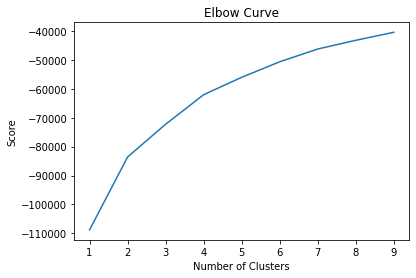

In [33]:
plt.plot(range(1, 10), score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

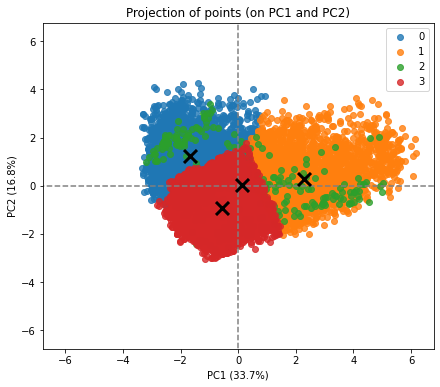

In [38]:
from sklearn.decomposition import PCA
from functions import *
pca = PCA(n_components=2)
pca.fit(weather_scaled)

weather_reduced = pca.transform(weather_scaled)

weather_reducesdf = pd.DataFrame(weather_reduced, index = weather_df.index, columns=['PC1', 'PC2'])

weather_reducesdf['cluster'] = clusters
centres_reduced = pca.transform(kmeans.cluster_centers_)

display_factorial_planes(weather_reduced, 2, pca, [(0,1)], illustrative_var = clusters, alpha = 0.8)

plt.scatter(centres_reduced[:, 0], centres_reduced[:,1], marker='x', s=169, linewidths=3, color='k', zorder=10)